In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

### The Dataset I will use for this project consists of NBA MVPs and the teams they played for from 1956 to 2023.

I decided to use this dataset as I am a big NBA fan, and wanted to create some interesting plots regarding the relation of MVP wins to NBA teams, player positions, individual players, and PPG stats. The dataset I am using is titled "1956-2023_NBA_MVPs.csv".

In [3]:
# loading the "1956-2023_NBA_MVPs.csv" dataset
df = pd.read_csv("C:/projects/1956-2023_NBA_MVPs_dataset.csv") # Change path to reflect the CSV file location on your computer - Michael
df

,YEAR,PLAYER,POS,TEAM,FG%,PPG,RPG,APG,BLKPG
0,2023,Joel Embiid,C,Philadelphia 76ers,0.548,33.1,10.2,4.2,1.7
1,2022,Nikola Jokic,C,Denver Nuggets,0.583,27.1,13.8,7.9,0.9
2,2021,Nikola Jokic,C,Denver Nuggets,0.566,26.4,10.8,8.3,0.7
3,2020,Giannis Antetokounmpo,F,Milwaukee Bucks,0.553,29.5,13.6,5.6,1.0
4,2019,Giannis Antetokounmpo,F,Milwaukee Bucks,0.578,27.7,12.5,5.9,1.5
...,...,...,...,...,...,...,...,...,...
63,1960,Wilt Chamberlain,C,Philadelphia Warriors,NaN,NaN,NaN,NaN,NaN
64,1959,Bob Pettit,PF,St. Louis Hawks,NaN,NaN,NaN,NaN,NaN
65,1958,Bill Russell,C,Boston Celtics,NaN,NaN,NaN,NaN,NaN
66,1957,Bob Cousy,PG,Boston Celtics,NaN,NaN,NaN,NaN,NaN


### For the first three plots, I will be examine the qualitative relationships between MVP wins by team, MVP wins by player position, and MVP wins by individual player between 1956 to 2023.

In order to do this, I will first create a new dataframe ignoring the FG% (field goal percentage), PPG (points per game), RPG (rebounds per game), APG (assists per game), and BLKPG (blocks per game) statistics since there is no numerical data available for these columns between the years of 1956 to 1986 and I want to analyze the entire dataset for the first three plots.

In [4]:
limited_df = df.drop(["FG%", "PPG", "RPG", "APG", "BLKPG"], axis=1).copy()
limited_df

,YEAR,PLAYER,POS,TEAM
0,2023,Joel Embiid,C,Philadelphia 76ers
1,2022,Nikola Jokic,C,Denver Nuggets
2,2021,Nikola Jokic,C,Denver Nuggets
3,2020,Giannis Antetokounmpo,F,Milwaukee Bucks
4,2019,Giannis Antetokounmpo,F,Milwaukee Bucks
...,...,...,...,...
63,1960,Wilt Chamberlain,C,Philadelphia Warriors
64,1959,Bob Pettit,PF,St. Louis Hawks
65,1958,Bill Russell,C,Boston Celtics
66,1957,Bob Cousy,PG,Boston Celtics


In order to determine MVP wins by team, one must figure out the amount of times the team appears in MVP wins dataset. This can be done by applying the value_counts( ) command to a limited dataframe for the 'TEAM' variable.

## Creating Plot #1: Number of MVP Wins by NBA Team (1956-2023)

In [5]:
wincount = limited_df['TEAM'].value_counts()
wincount

TEAM
Boston Celtics            10
Los Angeles Lakers         8
Philadelphia 76ers         7
Chicago Bulls              6
Milwaukee Bucks            5
Houston Rockets            4
San Antonio Spurs          3
Phoenix Suns               3
Cleveland Cavaliers        2
Miami Heat                 2
Denver Nuggets             2
Golden State Warriors      2
Utah Jazz                  2
Oklahoma City Thunder      2
St. Louis Hawks            2
Dallas Mavericks           1
Minnesota Timberwolves     1
Portland Trail Blazers     1
Buffalo Braves             1
New York Knicks            1
Baltimore Bullets          1
Cincinnati Royals          1
Philadelphia Warriors      1
Name: count, dtype: int64

Next, a pandas dataframe can be created using this information.

In [6]:
wincount_df = pd.DataFrame({'TEAM': wincount.index, 'MVP WINS': wincount.values})
wincount_df

,TEAM,MVP WINS
0,Boston Celtics,10
1,Los Angeles Lakers,8
2,Philadelphia 76ers,7
3,Chicago Bulls,6
4,Milwaukee Bucks,5
5,Houston Rockets,4
6,San Antonio Spurs,3
7,Phoenix Suns,3
8,Cleveland Cavaliers,2
9,Miami Heat,2


From there, we can create our first plot.

## Plot #1: Number of MVP Wins by NBA Team (1956-2023)

In [7]:
wincount_df.set_index('TEAM', inplace=True)

Text(0.5, 1.0, 'Number of MVP Wins by NBA Team (1956-2023)')

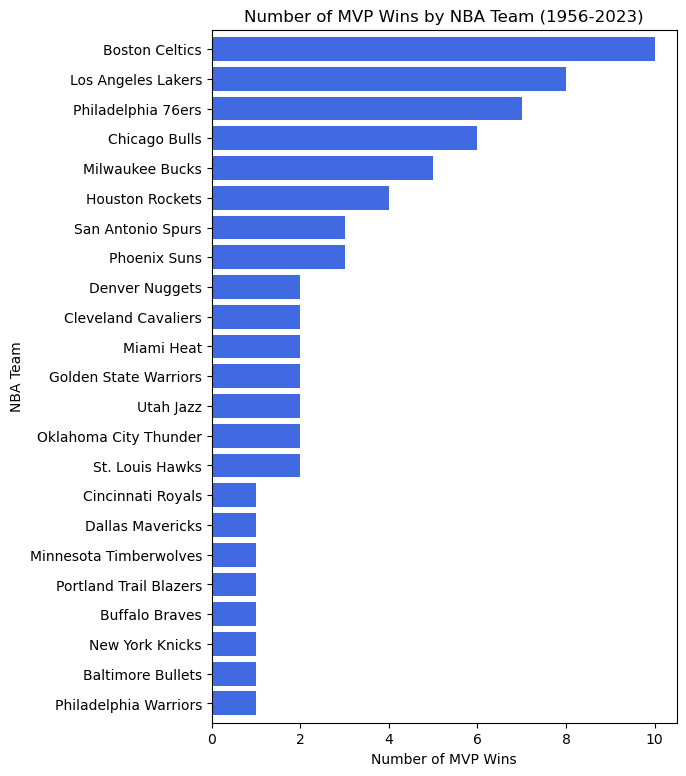

In [8]:
wincount_df = wincount_df.sort_values(by='MVP WINS', ascending=True)

(wincount_df['MVP WINS']
 .plot(kind='barh', x='MVP WINS', y='TEAM', xlabel='Number of MVP Wins', ylabel='NBA Team', color = 'royalblue', width=0.8, figsize=(6, 9))
)
plt.title('Number of MVP Wins by NBA Team (1956-2023)')

### What I learned from Plot #1:

From Plot #1, I was hoping to find which NBA team/franchise historically has the most amount of MVP wins between 1956 and 2023. The graph shows that the top five teams with the most MVP wins during that time were the Boston Celtics, the Los Angeles Lakers, the Philadelphia 76ers, the Chicago Bulls, and the Milwaukee Bucks.

The plot showed what I had originally expected in that teams like the Boston Celtics and Los Angeles Lakers were among the NBA franchises with the most MVP wins throughout the examined timeframe. What surprised me, however, was learning that the Philadelphia 76ers are not very far behing the Los Angeles Lakers with respect to MVP wins. This is surprising to me because in my own lifetime, I have only ever witnessed two MVP winners come from Philadelphia, with those being Allen Iverson, and most recently, Joel Embiid. Further examination of the dataset shows that in previous decades, MVP winners from Philadelphia consisted of NBA greats such as Wilt Chamberlain, Julius Erving, and Moses Malone. All players whose accomplishments serve to contribute to the total number of MVP wins that Philadelphia holds as a team.

## Creating Plot #2: Number of NBA Wins by Player Position (1956-2023)

Like before, I will start with creating a limited dataframe. This time, howevever, it will consist of value counts for player position for the 'POS' variable rather than the 'TEAM' variable.

In [9]:
poscount = limited_df['POS'].value_counts()
poscount

POS
C        28
F         9
G         9
SF        5
PG        5
PF        5
SF/PF     3
C/PF      3
SG        1
Name: count, dtype: int64

In [10]:
poscount_df = pd.DataFrame({'POS': poscount.index, 'MVP WINS': poscount.values})
poscount_df

,POS,MVP WINS
0,C,28
1,F,9
2,G,9
3,SF,5
4,PG,5
5,PF,5
6,SF/PF,3
7,C/PF,3
8,SG,1


## Plot #2: Number of NBA Wins by Player Position (1956-2023)

In [11]:
poscount_df.set_index('POS', inplace=True)

(0.0, 30.0)

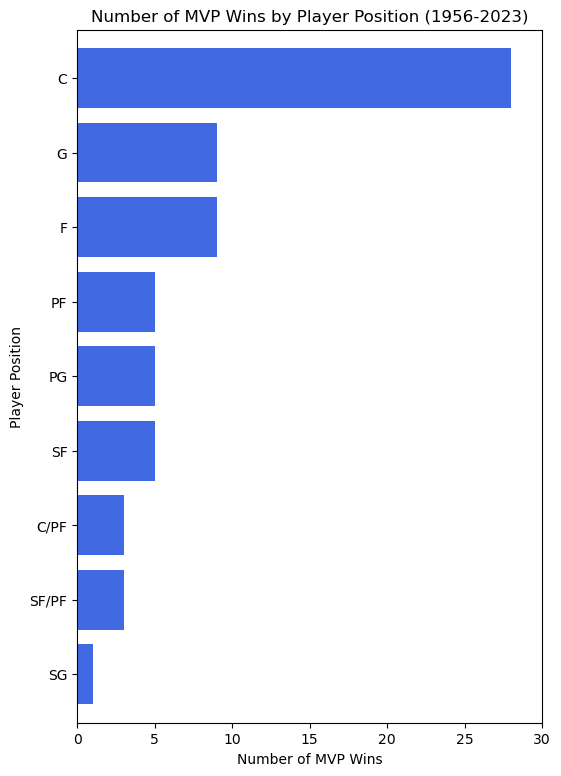

In [12]:
poscount_df = poscount_df.sort_values(by='MVP WINS', ascending=True)
ax=poscount_df['MVP WINS'].plot(kind='barh', x='MVP WINS', y='Player Position', xlabel='Number of MVP Wins', ylabel='Player Position', color = 'royalblue', width=0.8, figsize=(6, 9))
plt.title('Number of MVP Wins by Player Position (1956-2023)')
ax.set_xlim(0,30)

### What I learned from Plot #2:

From Plot #2, I was hoping to find which out player position throughout history held the most number of MVP wins. I was surprised to see that Centers (C), held the most amount of wins by a huge margin (28 total wins). This is followed by a tie between Forwards (F) and combo guards (G) who each have a combined total of 9 MVP wins throughout the 1956-2023 timeframe. And while I knew that there were many great NBA centers throughout history, I had no idea that the total amount of MVP wins earned by players in this position held the lead when compared to other positions by such an overwhelming degree.

As a result, the plot did not show what I had originally expected. At first, I assumed the highest total MVP wins by an NBA position would belong to either a combo guard, forward, or even someone playing the small forward position (SF). I was under this impression as I had gone a majority of my life watching players succeed in a league where aside from the past few years thanks to Joel Embiid and Nikola Jokic, had been dominated by guard play. From this analysis, however, we can see that Centers have historically won the most amount of MVPs when compared to other positions and can also infer that Centers between 1956 and 2023 have been the most popular players among MVP voters.

## Creating Plot #3: Number of MVP Wins by NBA Player (1956-2023)

In [13]:
playercount = limited_df['PLAYER'].value_counts()
playercount

PLAYER
Kareem Abdul-Jabbar      6
Michael Jordan           5
Bill Russell             5
LeBron James             4
Wilt Chamberlain         4
Larry Bird               3
Moses Malone             3
Magic Johnson            3
Nikola Jokic             2
Karl Malone              2
Tim Duncan               2
Steve Nash               2
Stephen Curry            2
Bob Pettit               2
Giannis Antetokounmpo    2
David Cowens             1
Willis Reed              1
Bob McAdoo               1
Bill Walton              1
Wes Unseld               1
Oscar Robertson          1
Julius Erving            1
Joel Embiid              1
David Robinson           1
Charles Barkley          1
Hakeem Olajuwon          1
Shaquille O'Neal         1
Allen Iverson            1
Kevin Garnett            1
Dirk Nowitzki            1
Kobe Bryant              1
Derrick Rose             1
Kevin Durant             1
Russell Westbrook        1
James Harden             1
Bob Cousy                1
Name: count, dtype: i

In [14]:
playercount_df = pd.DataFrame({'PLAYER': playercount.index, 'MVP WINS': playercount.values})
playercount_df

,PLAYER,MVP WINS
0,Kareem Abdul-Jabbar,6
1,Michael Jordan,5
2,Bill Russell,5
3,LeBron James,4
4,Wilt Chamberlain,4
5,Larry Bird,3
6,Moses Malone,3
7,Magic Johnson,3
8,Nikola Jokic,2
9,Karl Malone,2


## Plot #3: Number of MVP Wins by NBA Player (1956-2023)

In [15]:
playercount_df.set_index('PLAYER', inplace=True)

(0.0, 7.0)

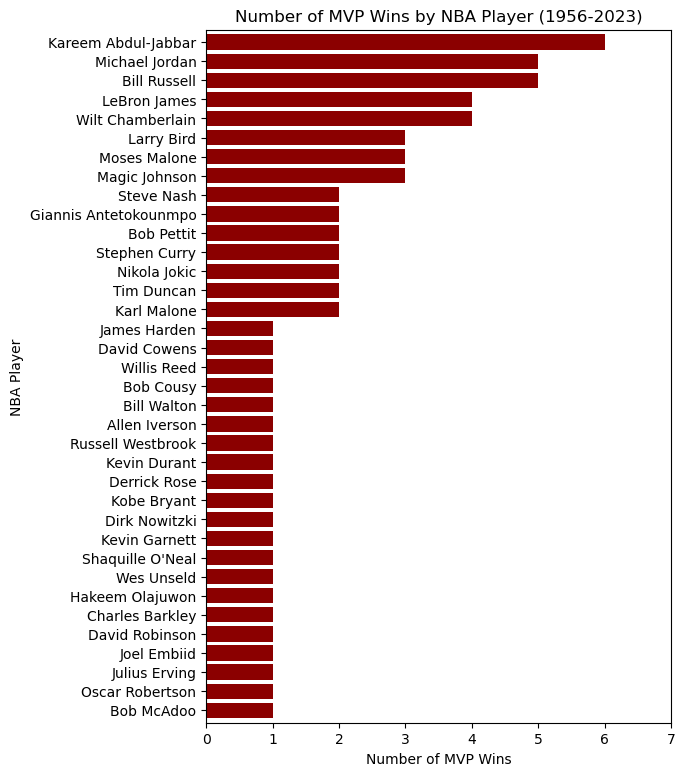

In [16]:
playercount_df = playercount_df.sort_values(by='MVP WINS', ascending=True)
ax=playercount_df['MVP WINS'].plot(kind='barh',
                                   x='MVP WINS',
                                   y='Player',
                                   xlabel='Number of MVP Wins',
                                   ylabel='NBA Player',
                                   color = 'darkred',
                                   width=0.8,
                                   figsize=(6, 9))
plt.title('Number of MVP Wins by NBA Player (1956-2023)')
ax.set_xlim(0,7)

### What I learned from Plot #3:

From Plot #3, I was hoping to find out which NBA players held the amount of MVP wins. From this plot, I managed to determine that the top 5 NBA players with the most MVP wins are Kareem Abdul-Jabbar, Michael Jordan, Bill Russell, LeBron James, and Wilt Chamberlain. Though among the top 5, Michael Jordan and Bill Russell are tied with one another as are LeBron James and Wilt Chamberlain.

This plot actually did show what I had originally expected. I was aware that Kareem Abdul-Jabbar, Bill Russell, and Michael Jordan are often considered some of the most prolific players of their eras, so seeing them so high on the leaderboard did not come as a tremendous surprise. However, I wasn't aware that LeBron James and Wilt Chamberlain had the same number of MVP wins as one another.

## Creating Plot #4: PPG Averages for Players with Multiple MVP Wins (1987-2023)

Plot #4 is a little different from the previous three. It consists of data from 1987 to 2023 as those are the only years that information for FG%, PPG, RPG, APG, and BLKPG statistics are available, as the years of 1956 through 1986 do not contain data for these fields.

Therefore, the plot I made for this information reflects the PPG (points per game) averages for players who between 1987 and 2023 had won multiple NBA MVPs. I could have done all MVP winners during this time period for this Plot #4, but decided that it may not have been fair to put players who may have only had one MVP win in with those who had many. My reasoning for this is because some players who earned one MVP win had an exceptional year, whereas those who had multiple had more consistent stats. Because of that, I wanted to stick with players who had more than one MVP win for this analysis.

The first step in this was to create a new dataframe consisting of the years between 1987 and 2023 using the .loc[ ] function.

In [17]:
df_87_23 = df.loc[0:36]
df_87_23

,YEAR,PLAYER,POS,TEAM,FG%,PPG,RPG,APG,BLKPG
0,2023,Joel Embiid,C,Philadelphia 76ers,0.548,33.1,10.2,4.2,1.7
1,2022,Nikola Jokic,C,Denver Nuggets,0.583,27.1,13.8,7.9,0.9
2,2021,Nikola Jokic,C,Denver Nuggets,0.566,26.4,10.8,8.3,0.7
3,2020,Giannis Antetokounmpo,F,Milwaukee Bucks,0.553,29.5,13.6,5.6,1.0
4,2019,Giannis Antetokounmpo,F,Milwaukee Bucks,0.578,27.7,12.5,5.9,1.5
5,2018,James Harden,G,Houston Rockets,0.449,30.4,5.4,8.8,0.7
6,2017,Russell Westbrook,G,Oklahoma City Thunder,0.425,31.6,10.7,10.4,0.4
7,2016,Stephen Curry,G,Golden State Warriors,0.504,30.1,5.4,6.7,0.2
8,2015,Stephen Curry,G,Golden State Warriors,0.487,23.8,4.3,7.7,0.2
9,2014,Kevin Durant,F,Oklahoma City Thunder,0.503,32.0,7.4,5.5,0.7


Next, I wanted to check the value_counts for MVP winners within this time period.

In [18]:
playercount2 = df_87_23['PLAYER'].value_counts()
playercount2

PLAYER
Michael Jordan           5
LeBron James             4
Magic Johnson            3
Karl Malone              2
Tim Duncan               2
Nikola Jokic             2
Steve Nash               2
Stephen Curry            2
Giannis Antetokounmpo    2
Kevin Durant             1
Derrick Rose             1
Kobe Bryant              1
Dirk Nowitzki            1
Kevin Garnett            1
Russell Westbrook        1
Allen Iverson            1
Shaquille O'Neal         1
James Harden             1
David Robinson           1
Hakeem Olajuwon          1
Charles Barkley          1
Joel Embiid              1
Name: count, dtype: int64

Following this, I identified players who achieved a number of MVP wins that was greater than or equal to 2.

In [19]:
mw = df_87_23['PLAYER'].value_counts() >= 2
mw

PLAYER
Michael Jordan            True
LeBron James              True
Magic Johnson             True
Karl Malone               True
Tim Duncan                True
Nikola Jokic              True
Steve Nash                True
Stephen Curry             True
Giannis Antetokounmpo     True
Kevin Durant             False
Derrick Rose             False
Kobe Bryant              False
Dirk Nowitzki            False
Kevin Garnett            False
Russell Westbrook        False
Allen Iverson            False
Shaquille O'Neal         False
James Harden             False
David Robinson           False
Hakeem Olajuwon          False
Charles Barkley          False
Joel Embiid              False
Name: count, dtype: bool

And finally, I isolated those players on their own along with their average PPG across all of their appearances.

In [20]:
ppg_player = df_87_23.groupby('PLAYER')['PPG'].mean()
mw2 = ppg_player[df_87_23['PLAYER'].value_counts() >= 2]
mw2

PLAYER
Giannis Antetokounmpo    28.60
Karl Malone              25.60
LeBron James             28.00
Magic Johnson            22.90
Michael Jordan           31.14
Nikola Jokic             26.75
Stephen Curry            26.95
Steve Nash               17.15
Tim Duncan               24.40
Name: PPG, dtype: float64

After that, I created a pandas dataframe to present these values.

In [21]:
mw2_df = pd.DataFrame({'PLAYER': mw2.index, 'PPG': mw2.values})
mw2_df

,PLAYER,PPG
0,Giannis Antetokounmpo,28.60
1,Karl Malone,25.60
2,LeBron James,28.00
3,Magic Johnson,22.90
4,Michael Jordan,31.14
5,Nikola Jokic,26.75
6,Stephen Curry,26.95
7,Steve Nash,17.15
8,Tim Duncan,24.40


## Plot #4: PPG Averages for Players with Multiple MVP Wins (1987-2023)

In [22]:
mw2_df.set_index('PLAYER', inplace=True)

Text(0.5, 1.0, 'PPG Averages for Players with Multiple MVP Wins (1987-2023)')

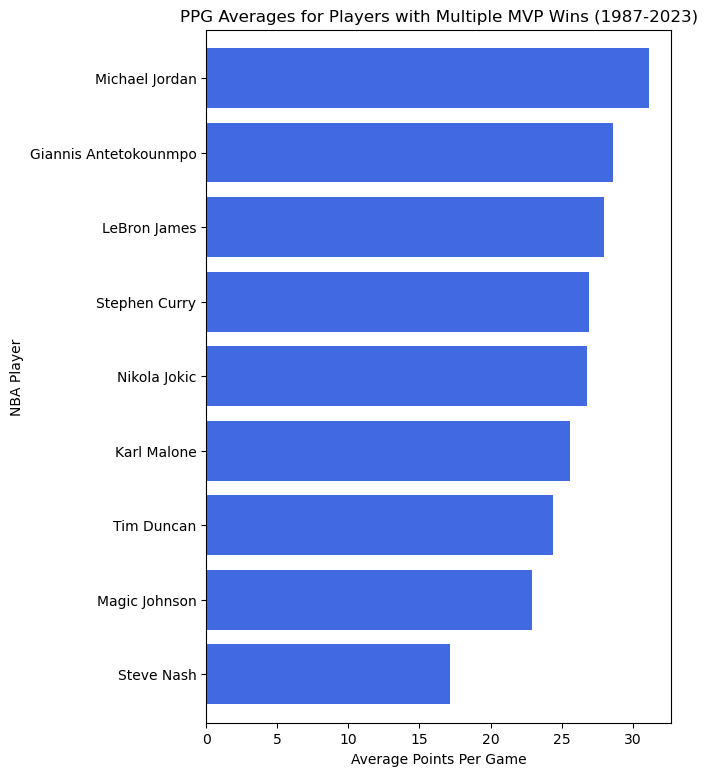

In [23]:
mw2_df = mw2_df.sort_values(by='PPG', ascending=True)

(mw2_df['PPG']
 .plot(kind='barh',
       x='PPG',
       y='PLAYER',
       xlabel='Average Points Per Game',
       ylabel='NBA Player',
       color = 'royalblue',
       width=0.8, figsize=(6, 9))
)
plt.title('PPG Averages for Players with Multiple MVP Wins (1987-2023)')

### What I learned from Plot #4:

From Plot #4, I was hoping to find out which NBA player scored the highest average points per game across their MVP winning seasons. From Plot #4, we can see that Michael Jordan is the player who had the greatest average points per game across his MVP winning seasons, with an average PPG of roughly 31.14 points per game. This is an especially impressive statistic considering that Jordan won a total of 5 MVPs in his career and managed to achieve the highest average from the players shown in the bar chart, indicating that he was a consistently high-scorer throughout all of his MVP winning seasons.

The plot showed what I had expected, though it did show an interesting takeaway. I wasn't aware that Jordan was the only player with multiple MVP wins who managed to achieve a compiled average PPG of over 30 points per game across all of his MVP-winning seasons. Though not shown on Plot #4 due to them having only one MVP win each, players like Joel Embiid and Allen Iverson managed to have MVP-winning seasons averaging over 30 points per game as well. However, by leaving those players out and only including individuals with multiple wins, I believe that this chart helps to illustrate just how impressive of a feat that Jordan's compiled scoring average was throughout his MVP-winning seasons. As he had a total of 5 MVP wins, with all but one season displaying an average PPG above the 30 points per game threshold.